# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you pulled lyrics data on two artists. In this assignment we explore this data set and a pull from the now-defunct Twitter API for the artists Cher and Robyn.  If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Canvas. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


# Importing Packages

In [1]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")

In [2]:
# change `data_location` to the location of the folder on your machine.
data_location = "C:/Users/sowmi/gitworkspace/ADS_509_Token_Norm/M1 Assignment Data/M1 Results/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [3]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    # Fill in the correct values here. 
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = num_unique_tokens/num_tokens
    num_characters = sum(len(token) for token in tokens)
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
        
        # print the five most common tokens
        counter = Counter(tokens)
        if num_tokens > 0:
            print(counter.most_common(5))
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])
    

In [4]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.
[('text', 3), ('here', 2), ('example', 2), ('is', 1), ('some', 1)]


**Q: Why is it beneficial to use assertion statements in your code?**

A: Assertion statements check whether a condition is true, and if it is false, they raise an AssertionError. They help detect programming errors by ensuring specific conditions are met, simplifying debugging. Additionally, assertions validate inputs and outputs at the start and end of a function.

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [5]:
# Function to find the folder path
def find_directory(target_dir, start_path='.'):
    
    # Walk through the directory tree from the current directory
    for root, dirs, files in os.walk(start_path):
        if target_dir in dirs:
            path = os.path.join(root, target_dir)
    return path


In [6]:
# Read in the lyrics data
song_list = []
#lyrics_folder_path = os.path.join(data_location, lyrics_folder)
lyrics_folder_path = find_directory("lyrics")

for artist_folder in os.listdir(lyrics_folder_path):
    artist_path = os.path.join(lyrics_folder_path, artist_folder)
    
    # Check if it is a directory
    if os.path.isdir(artist_path):
        for filename in os.listdir(artist_path):
            if filename.endswith('.txt'):
                title = filename.split('_')[1].replace(".txt", "")
                file_path = os.path.join(artist_path, filename)
                
                with open(file_path, 'r', encoding='utf-8') as file:
                    lyrics = file.read()
                    song_list.append({'artist_name': artist_folder, 'song_title': title, 'lyrics': lyrics})

lyrics_df = pd.DataFrame(song_list)

In [7]:
lyrics_df.head()

,artist_name,song_title,lyrics
0,cher,88degrees,"""88 Degrees""\n\n\n\nStuck in L.A., ain't got n..."
1,cher,adifferentkindoflovesong,"""A Different Kind Of Love Song""\n\n\n\nWhat if..."
2,cher,afterall,"""After All""\n\n\n\nWell, here we are again\nI ..."
3,cher,again,"""Again""\n\n\n\nAgain evening finds me at your ..."
4,cher,alfie,"""Alfie""\n\n\n\nWhat's it all about, Alfie?\nIs..."


In [8]:
# Read in the twitter data

# Finding the twitter directory
twitter_path = find_directory("twitter")
twitter_files = os.listdir(twitter_path)
twitter_files = [f for f in twitter_files if 'followers_data' in f]

# Dictionary of lists to store the description
twitter_desc = defaultdict(list)

for file in twitter_files:
    data_path = os.path.join(twitter_path, file)
    artist = file.split('_')[0]
    
    with open(data_path, 'r', encoding='utf-8') as txtfile:
        # skipping the column header
        next(txtfile) 
        
        for idx, line in enumerate(txtfile.readlines()):
            line = line.strip().split('\t')
            
            # Check if the line has 7 columns
            if len(line) == 7:
                twitter_desc[artist].append(line[6])

## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [9]:
punctuation = set(punctuation) # speeds up comparison

In [10]:
# create your clean twitter data here
twitter_cleaned = defaultdict(list)

for artist in twitter_desc:
    descriptions = " ".join(twitter_desc[artist])

    # Removing Punctuation
    descriptions = "".join([char for char in descriptions if char not in punctuation])
    
    # Case Folding and tokenization
    descriptions = [token.lower().strip() for token in descriptions.split()]
    
    # Removing stop words
    descriptions = [token for token in descriptions if token not in sw]
    twitter_cleaned[artist].extend(descriptions)  

In [11]:
# create your clean lyrics data here
lyrics_cleaned = lyrics_df.copy()

# Removing punctuation
lyrics_cleaned['lyrics'] = lyrics_cleaned['lyrics'].apply(lambda x: "".join([char for char in x if char not in punctuation]))

# Case Folding and tokenization
lyrics_cleaned['lyrics'] = lyrics_cleaned['lyrics'].apply(lambda x: [token.lower().strip() for token in x.split()])

# Removing stop words
lyrics_cleaned['lyrics'] = lyrics_cleaned['lyrics'].apply(lambda tokens: [token for token in tokens if token not in sw])

## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [12]:
# calls to descriptive_stats on cher lyrics 
cher_lyrics  = lyrics_cleaned['lyrics'][lyrics_cleaned['artist_name'] == "cher"]

# Flatten the series of lists into single list of tokens
cher_lyrics_tokens = [token for sublist in cher_lyrics for token in sublist]

descriptive_stats(cher_lyrics_tokens, num_tokens = 5)

There are 35916 tokens in the data.
There are 3703 unique tokens in the data.
There are 172634 characters in the data.
The lexical diversity is 0.103 in the data.
[('love', 1004), ('im', 513), ('know', 486), ('dont', 440), ('youre', 333)]


[35916, 3703, 0.10310168170174852, 172634]

In [13]:
# calls to descriptive_stats on robyn lyrics
robyn_lyrics  = lyrics_cleaned['lyrics'][lyrics_cleaned['artist_name'] == "robyn"]

# Flatten the series of lists into single list of tokens
robyn_lyrics_tokens = [token for sublist in robyn_lyrics for token in sublist]

descriptive_stats(robyn_lyrics_tokens, num_tokens = 5)

There are 15227 tokens in the data.
There are 2156 unique tokens in the data.
There are 73787 characters in the data.
The lexical diversity is 0.142 in the data.
[('know', 308), ('dont', 301), ('im', 299), ('love', 275), ('got', 251)]


[15227, 2156, 0.14159059565245943, 73787]

In [14]:
# calls to descriptive_stats on cher twitter description
descriptive_stats(twitter_cleaned['cher'], num_tokens = 5)

There are 15670504 tokens in the data.
There are 1517718 unique tokens in the data.
There are 92951718 characters in the data.
The lexical diversity is 0.097 in the data.
[('love', 214576), ('im', 139098), ('life', 122980), ('music', 88177), ('de', 72974)]


[15670504, 1517718, 0.09685189448916257, 92951718]

In [15]:
# calls to descriptive_stats on robyn twitter description
descriptive_stats(twitter_cleaned['robynkonichiwa'], num_tokens = 5)

There are 1495526 tokens in the data.
There are 252736 unique tokens in the data.
There are 9127817 characters in the data.
The lexical diversity is 0.169 in the data.
[('music', 15147), ('love', 11677), ('im', 9051), ('och', 7922), ('life', 7383)]


[1495526, 252736, 0.16899472158959455, 9127817]

**Q: How do you think the "top 5 words" would be different if we left stopwords in the data?**

A: Including stopwords in the data would cause common words like "the," "and," and "of" to dominate the top 5 words. This can obscure more meaningful, content-specific terms, making it difficult to uncover significant patterns or insights in the data.

---

**Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs?**

A: My prior belief was that there would be significant lexical diversity between the artists, expecting varied and complex word usage. However, the observed lexical diversity values (0.103 and 0.142) indicate relatively low diversity, suggesting a higher degree of word repetition, which contradicts my initial assumption.



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [16]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [17]:
# Dictionary of lists to store the emojis
emojis = defaultdict(list)

for artist in twitter_desc:
    for desc in twitter_desc[artist]:
        emojis[artist].extend([char for char in desc if emoji.is_emoji(char)])

# Ten most common emojis
for artist in emojis:
    emoji_count = Counter(emojis[artist])
    print(artist)
    print(emoji_count.most_common(10))

cher
[('❤', 79223), ('🌈', 47549), ('♥', 33978), ('🏳', 33412), ('✨', 29468), ('💙', 21379), ('🏻', 20930), ('🌊', 20223), ('✌', 16773), ('💜', 16550)]
robynkonichiwa
[('❤', 4783), ('🌈', 4685), ('🏳', 3528), ('♥', 3103), ('✨', 2223), ('🏻', 1495), ('✌', 1189), ('🏼', 1139), ('♀', 836), ('💙', 809)]


### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [18]:
# Dictionary of lists to store the hashtags
hashtags = defaultdict(list)

for artist in twitter_desc:
    for desc in twitter_desc[artist]:
        for word in desc.split():
            if word.startswith('#'):
                hashtags[artist].append(word.lower())

# Ten most common hashtags
for artist in hashtags:
    hashtag_count = Counter(hashtags[artist])
    print(artist)
    print(hashtag_count.most_common(10))

cher
[('#resist', 9558), ('#blm', 8753), ('#blacklivesmatter', 7432), ('#fbr', 2922), ('#theresistance', 2883), ('#resistance', 2405), ('#1', 2226), ('#', 1965), ('#voteblue', 1897), ('#lgbtq', 1457)]
robynkonichiwa
[('#blacklivesmatter', 563), ('#blm', 324), ('#music', 260), ('#1', 187), ('#', 150), ('#teamfollowback', 117), ('#edm', 104), ('#resist', 76), ('#freebritney', 63), ('#lgbtq', 58)]


### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [19]:
title_tokens = defaultdict(list)

for artist, group in lyrics_df.groupby('artist_name'):
    titles = group['lyrics'].apply(lambda x: re.findall(r'\b\w+\b', x.split('\n')[0].lower()))
    
    for title in titles:
        title_tokens[artist].extend(title)

# Ten most common words
for artist in title_tokens:
    word_count = Counter(title_tokens[artist])
    print(artist)
    print(word_count.most_common(5))

cher
[('the', 54), ('you', 44), ('love', 38), ('i', 38), ('a', 28)]
robyn
[('me', 11), ('you', 9), ('the', 8), ('my', 8), ('to', 6)]


### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


artist
Artist 1    Axes(0.125,0.11;0.775x0.77)
Artist 2    Axes(0.125,0.11;0.775x0.77)
Name: length, dtype: object

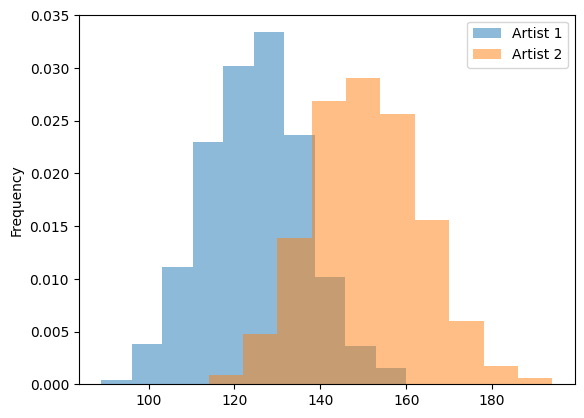

In [20]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

**Q: What does the regular expression `'\s+'` match on?**

A: The pattern '\s' matches any whitespace character and '+' signifies one or more occurrences of the preceding character. Therefore, '\s+' matches sequences of consecutive whitespace characters in a string or text.


In [21]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

In [26]:
lyrics_df.head()

,artist_name,song_title,lyrics,lyric_token,lyric_length
0,cher,88degrees,"""88 Degrees""\n\n\n\nStuck in L.A., ain't got n...","[""88, degrees"", stuck, in, l.a.,, ain't, got, ...",327
1,cher,adifferentkindoflovesong,"""A Different Kind Of Love Song""\n\n\n\nWhat if...","[""a, different, kind, of, love, song"", what, i...",263
2,cher,afterall,"""After All""\n\n\n\nWell, here we are again\nI ...","[""after, all"", well,, here, we, are, again, i,...",293
3,cher,again,"""Again""\n\n\n\nAgain evening finds me at your ...","[""again"", again, evening, finds, me, at, your,...",80
4,cher,alfie,"""Alfie""\n\n\n\nWhat's it all about, Alfie?\nIs...","[""alfie"", what's, it, all, about,, alfie?, is,...",135


In [23]:
# Your lyric length comparison chart here. 
lyrics_df['lyric_token'] = lyrics_df['lyrics'].apply(tokenize_lyrics)
lyrics_df['lyric_length'] = lyrics_df['lyric_token'].apply(len)

lyrics_df.groupby('artist_name')['lyric_length'].plot(kind="hist",density=True,alpha=0.5,legend=True)